In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

normalised_counts_all_genes = pd.read_csv("Normalized_counts_all_DEgenes_for_clustering.tabular", 
                                          sep="\t")

In [104]:
normalised_counts_all_genes

,Gene,L_la_1,L_la_2,L_la_3,L_la_4,E_la_1,E_la_2,E_la_3,E_la_4,BL_la_1,...,L_ao_3,L_ao_4,E_ao_1,E_ao_2,E_ao_3,E_ao_4,BL_ao_1,BL_ao_2,BL_ao_3,BL_ao_4
0,1700025G04Rik,7.467730,14.073139,5.672206,10.155949,90.736567,153.368761,30.004790,22.624826,10.524841,...,96.973997,67.119410,52.358211,92.324660,79.058215,26.986762,205.125989,222.681490,1.094508,400.602081
1,A530064D06Rik,3.733865,8.041794,7.562942,1.692658,104.816380,171.202337,2.727708,9.427011,16.341200,...,44.555620,15.196848,0.000000,0.000000,2.196062,0.000000,10.595912,46.115599,0.547254,0.000000
2,Actb,22830.718613,25731.729566,22306.896522,24922.697816,30041.625928,33101.496357,34595.522735,29976.009639,34499.597243,...,26048.001752,25171.045248,20822.701947,20856.580352,15119.883528,16183.623925,27745.803121,26722.410562,27383.496654,23646.533658
3,Actg1,1282.582688,1260.551171,1174.146698,1167.934087,1486.202397,2587.057542,1740.277813,1630.872906,1160.779153,...,2955.085976,2546.738378,1870.616092,2167.431306,1091.442573,1595.592312,2085.764525,1973.179107,2108.022485,2099.841465
4,Acvrl1,0.000000,0.000000,0.000000,3.385316,14.079812,53.500730,5.455416,1.885402,3.600603,...,138.908698,172.230940,141.208509,114.306722,170.194767,62.406887,69.280963,72.963722,211.787306,364.654764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Trerf1,0.000000,0.000000,3.781471,6.770632,62.576943,243.725550,10.910833,5.656207,4.708481,...,213.604884,181.095767,255.444606,87.928248,200.939629,317.094455,388.245083,203.414014,77.710071,353.643874
127,Trib1,126.951416,34.177623,64.285004,45.701769,139.233698,512.418107,510.081428,337.486994,153.995039,...,1134.857852,844.691446,645.751272,237.406269,345.879689,794.422811,194.258387,235.315901,16.964875,466.343570
128,Vaultrc5,5.600798,2.010448,15.125883,20.311897,381.719353,168.824527,13.638541,13.197815,0.276969,...,129.735482,604.074692,261.791056,520.974868,372.232427,829.842936,156.765160,101.707007,82.088103,273.652998
129,Vim,2212.315116,1572.170679,1760.274679,1785.754292,2847.250908,3350.334629,2424.932564,2560.376193,1821.628367,...,9167.974053,5218.850748,4921.671856,3930.392672,4650.160257,4076.687757,4873.847832,4155.141852,4332.062823,3842.476709


In [105]:
import seaborn as sns


y_labels = normalised_counts_all_genes["Gene"].tolist()
normalised_counts_all_genes = normalised_counts_all_genes.drop(columns=['Gene'])

In [106]:
sns.set(font_scale=2.25)
fig_size = (25,60)

def plot_cluster_genes(dataframe, z_score, file_name):
    g = sns.clustermap(dataframe,
                   row_cluster=True,
                   cmap="RdBu_r",
                   xticklabels='auto',
                   yticklabels=y_labels,
                   figsize=fig_size,
                   metric='cosine',
                   z_score=z_score,
                  )

    g.fig.suptitle('DEgenes for clustering_n=131')
    g.ax_heatmap.set_xlabel("Samples")
    g.ax_heatmap.set_ylabel("Genes")

    for a in g.ax_col_dendrogram.collections:
        a.set_linewidth(3)

    for a in g.ax_row_dendrogram.collections:
        a.set_linewidth(3)
    g.savefig('{}.pdf'.format(file_name), dpi=300, figsize=fig_size)
    g.savefig('{}.png'.format(file_name), dpi=300, figsize=fig_size)

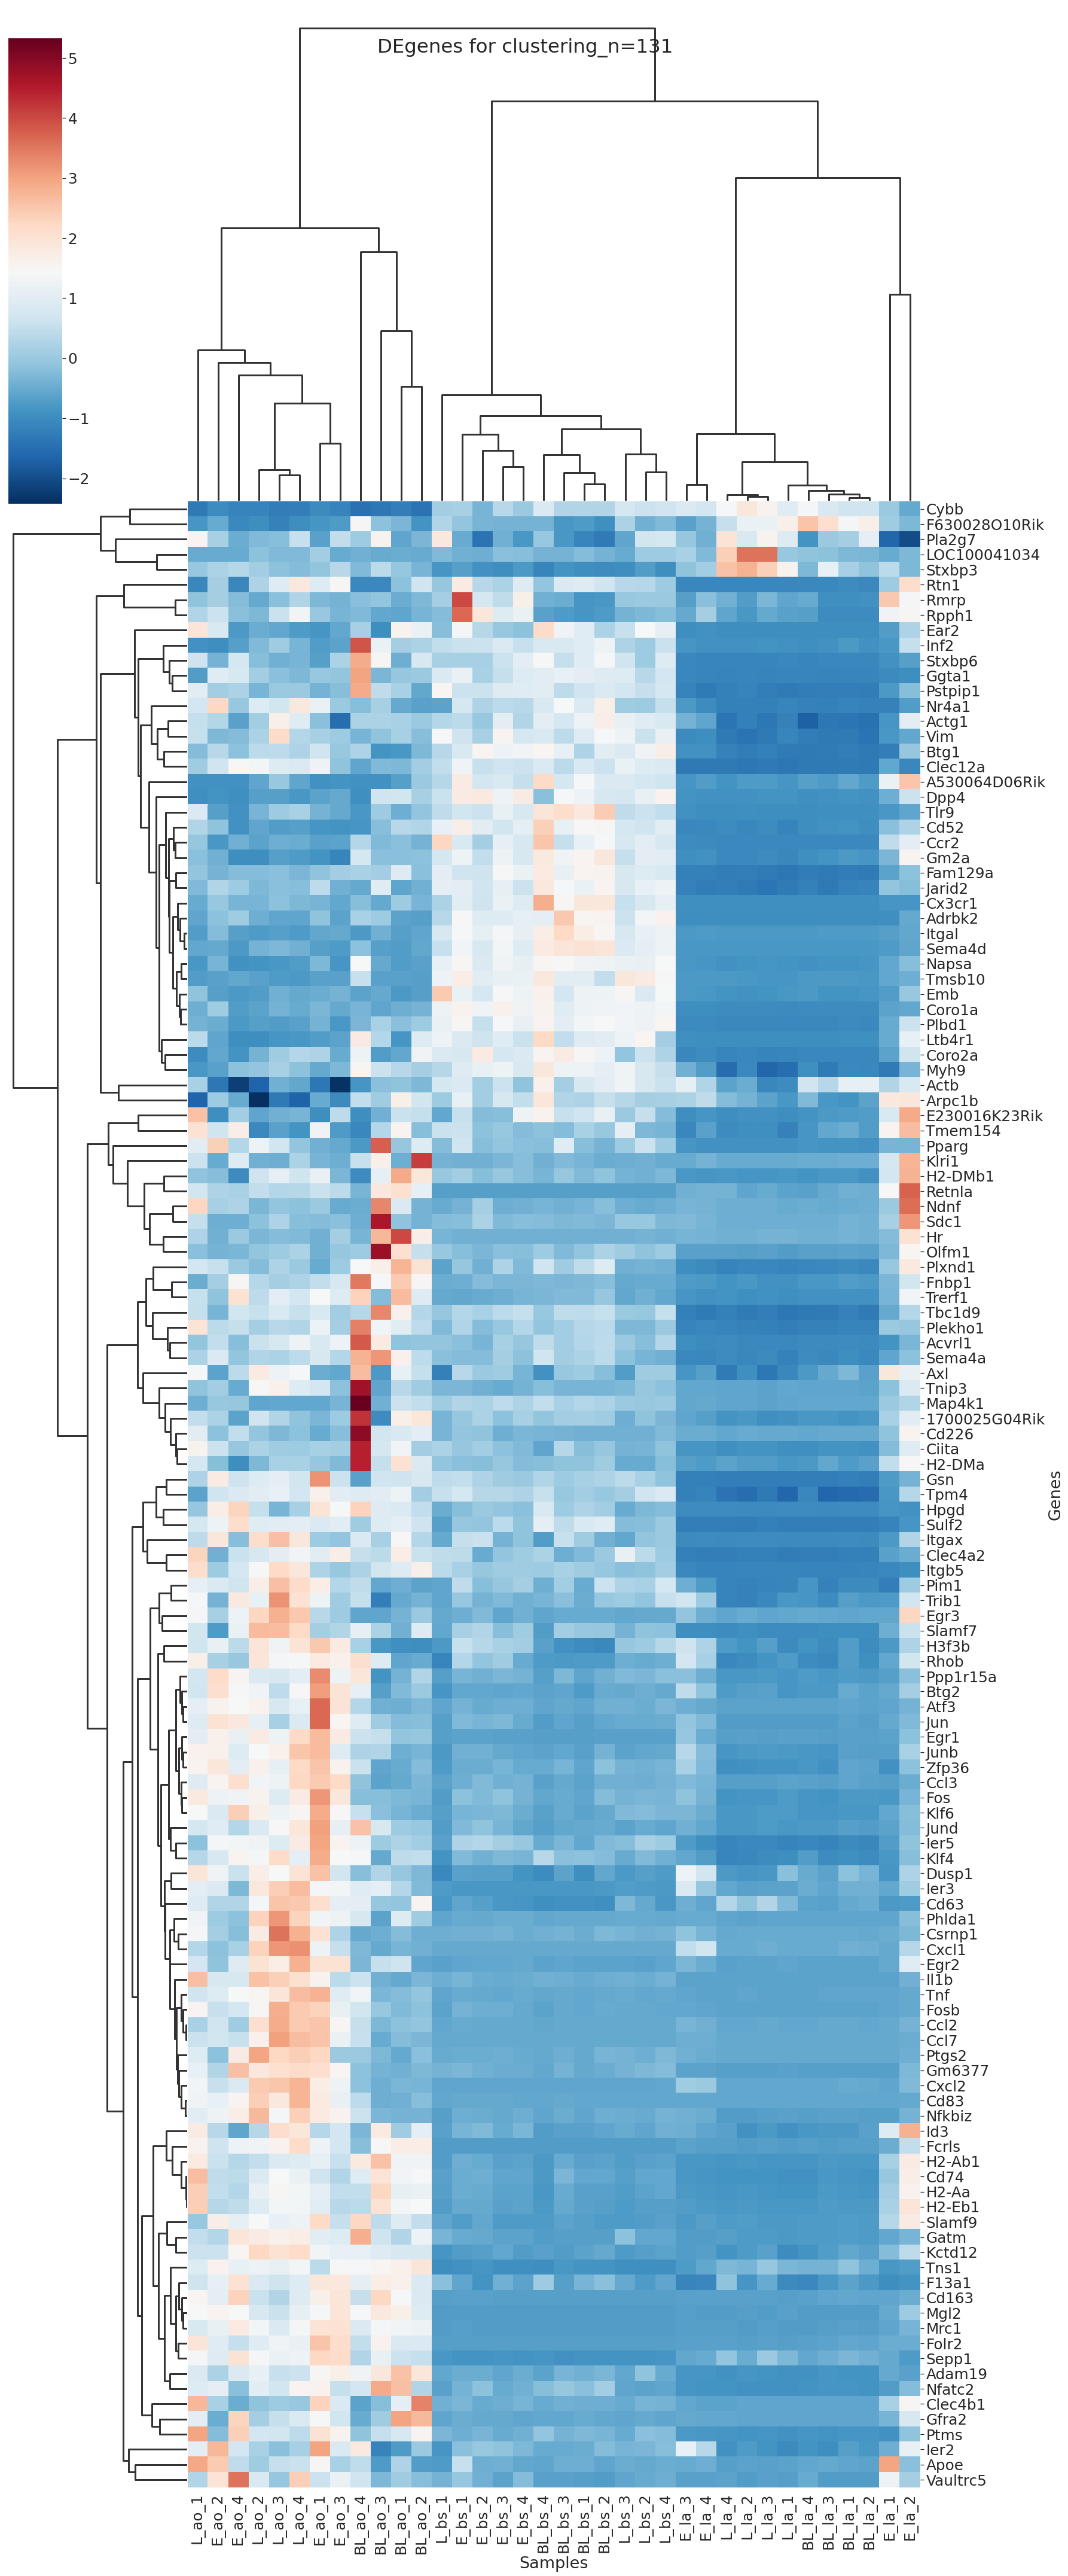

In [107]:
plot_cluster_genes(normalised_counts_all_genes, 0, "heatmap_with_Seaborn_clustermap_python")

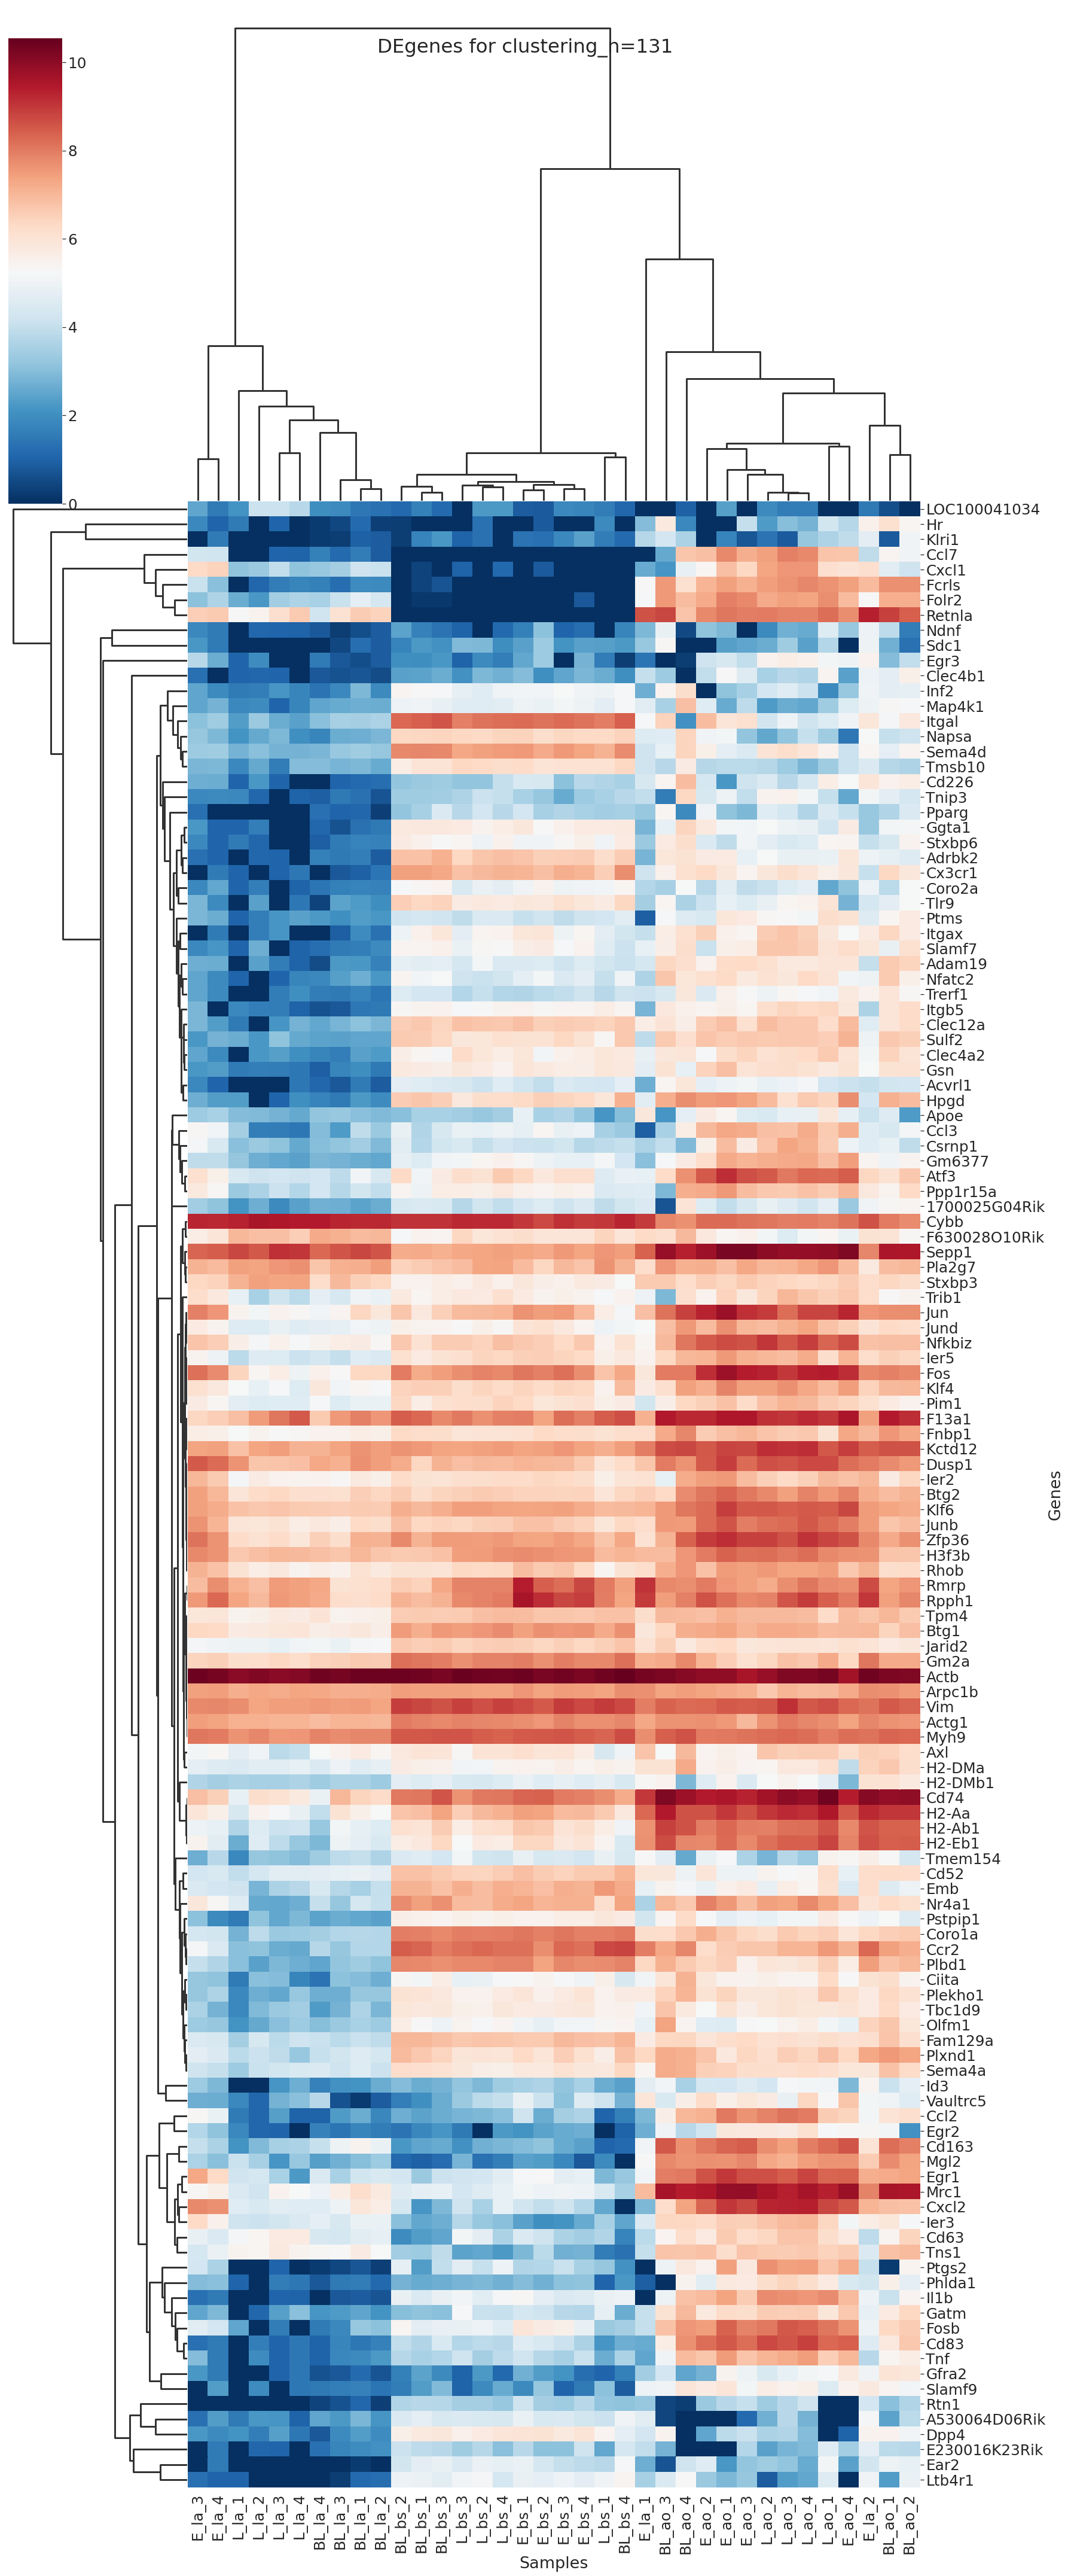

In [108]:
normalised_counts_all_genes_log = np.log(normalised_counts_all_genes + 1.0)
plot_cluster_genes(normalised_counts_all_genes_log, None, "heatmap_with_Seaborn_clustermap_python_log")